<a href="https://colab.research.google.com/github/nikhil6553/studious-waffle/blob/main/placement_predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import numpy as np
import pandas as pd

In [27]:
df=pd.read_csv('/content/college_student_placement_dataset.csv')

In [28]:
df.shape

(10000, 10)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   College_ID              10000 non-null  object 
 1   IQ                      10000 non-null  int64  
 2   Prev_Sem_Result         10000 non-null  float64
 3   CGPA                    10000 non-null  float64
 4   Academic_Performance    10000 non-null  int64  
 5   Internship_Experience   10000 non-null  object 
 6   Extra_Curricular_Score  10000 non-null  int64  
 7   Communication_Skills    10000 non-null  int64  
 8   Projects_Completed      10000 non-null  int64  
 9   Placement               10000 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 781.4+ KB


In [30]:
df.head()

,College_ID,IQ,Prev_Sem_Result,CGPA,Academic_Performance,Internship_Experience,Extra_Curricular_Score,Communication_Skills,Projects_Completed,Placement
0,CLG0030,107,6.61,6.28,8,No,8,8,4,No
1,CLG0061,97,5.52,5.37,8,No,7,8,0,No
2,CLG0036,109,5.36,5.83,9,No,3,1,1,No
3,CLG0055,122,5.47,5.75,6,Yes,1,6,1,No
4,CLG0004,96,7.91,7.69,7,No,8,10,2,No


In [33]:
import matplotlib.pyplot as plt

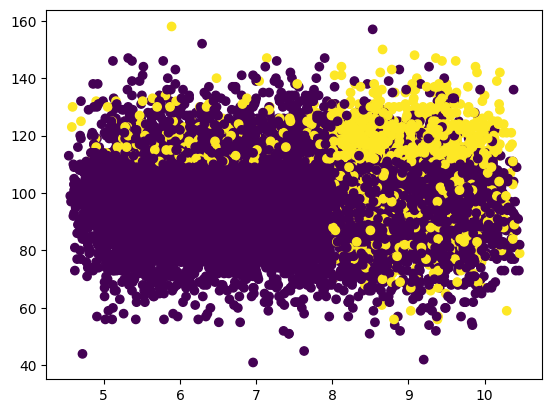

In [40]:
df['Placement_numeric'] = df['Placement'].apply(lambda x: 1 if x == 'Yes' else 0)
plt.scatter(df['CGPA'],df['IQ'],c=df['Placement_numeric'])

In [47]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [48]:
x

,IQ,Prev_Sem_Result
0,107,6.61
1,97,5.52
2,109,5.36
3,122,5.47
4,96,7.91
...,...,...
9995,119,8.41
9996,70,9.25
9997,89,6.08
9998,107,8.77


In [54]:
y.shape

(10000,)

In [46]:
x=df.iloc[:,4:7]
y=df.iloc[:,-1]

In [51]:
x

,IQ,Prev_Sem_Result
0,107,6.61
1,97,5.52
2,109,5.36
3,122,5.47
4,96,7.91
...,...,...
9995,119,8.41
9996,70,9.25
9997,89,6.08
9998,107,8.77


In [52]:
y

,Placement_numeric
0,0
1,0
2,0
3,0
4,0
...,...
9995,1
9996,0
9997,0
9998,0


In [55]:
from sklearn.model_selection import train_test_split
train_test_split(x,y,test_size=0.1)

[       IQ  Prev_Sem_Result
 8992   97             5.79
 829    95             5.47
 6935  107             8.50
 6849   85             5.05
 6204   82             8.49
 ...   ...              ...
 5755   84             8.43
 6542   73             5.18
 9933   89             9.98
 1355   61             6.08
 5912  118             6.60
 
 [9000 rows x 2 columns],
        IQ  Prev_Sem_Result
 1880  114             7.83
 43     95             5.84
 4638   69             5.85
 8796   92             6.30
 9291  105             9.93
 ...   ...              ...
 534    90             7.78
 4309   93             9.52
 8077  117             9.91
 4834   71             9.60
 2883  106             6.53
 
 [1000 rows x 2 columns],
 8992    0
 829     0
 6935    1
 6849    0
 6204    1
        ..
 5755    0
 6542    0
 9933    0
 1355    0
 5912    0
 Name: Placement_numeric, Length: 9000, dtype: int64,
 1880    0
 43      0
 4638    0
 8796    0
 9291    0
        ..
 534     0
 4309    0
 8077    

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [58]:
x_train

,IQ,Prev_Sem_Result
7509,92,5.12
2441,120,5.74
20,121,8.41
2405,120,5.14
9288,100,9.57
...,...,...
4127,126,5.74
4809,93,9.45
5628,87,5.30
942,109,7.79


In [59]:
x_test

,IQ,Prev_Sem_Result
1916,88,8.90
3777,81,9.69
6047,122,8.57
725,97,9.44
559,93,8.58
...,...,...
2370,97,9.34
9950,113,8.33
460,129,8.52
587,87,6.33


In [60]:
y_train

,Placement_numeric
7509,0
2441,0
20,1
2405,0
9288,0
...,...
4127,0
4809,0
5628,0
942,0


In [61]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
x_train=scaler.fit_transform(x_train)


In [65]:
x_train

array([[-0.49581636, -1.66919745],
       [ 1.36993629, -1.24053015],
       [ 1.43657031,  0.60550486],
       ...,
       [-0.82898648, -1.54474566],
       [ 0.63696203,  0.17683756],
       [-0.09601222,  0.60550486]])

In [66]:
x_test=scaler.fit_transform(x_test)

In [68]:
x_test

array([[-0.76058312,  0.92731989],
       [-1.21369647,  1.46942762],
       [ 1.44025315,  0.70086982],
       ...,
       [ 1.89336649,  0.6665592 ],
       [-0.8253136 , -0.83624579],
       [-0.11327834,  1.38708214]])

In [69]:
from sklearn.linear_model import LogisticRegression

In [71]:
clf=LogisticRegression()

In [76]:
#model training
clf.fit(x_train,y_train)

LogisticRegression()

In [77]:
clf.predict(x_train)

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
y_test

,Placement_numeric
1916,0
3777,1
6047,1
725,0
559,0
...,...
2370,0
9950,1
460,0
587,0


In [80]:
from sklearn.metrics import accuracy_score

In [84]:
y_predict = clf.predict(x_test)
accuracy_score(y_test,y_predict)

0.849

In [85]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

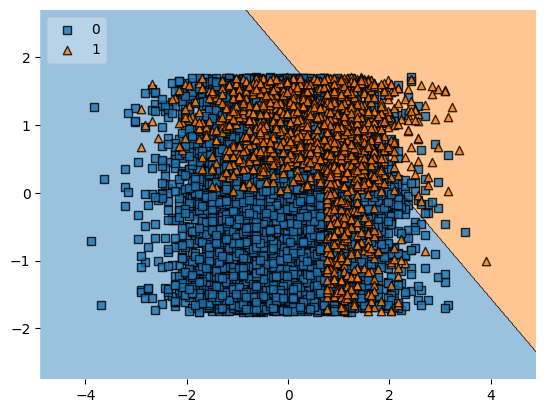

In [96]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [97]:
import pickle

In [98]:
pickle.dump(clf,open('model.pk1','wb'))